# <center> Correlating NGS and State Based Science Standards </center>   

<p align="center">
  <img width="250" height="100" src="NGSS.png">
</p>
 
 [](NGSS.png) 
 
### <center> Capstone Project - The Flatiron School - By Kristen Davis </center>

#### Summary:  
In April of 2013 a collection of rigorous, and internationally benchmarked standards for K-12 science education standards were released called [Next Generation Science Standards (NGS)](https://www.nextgenscience.org/) . These standards were crafted to prepare students to be better decision makers about scientific and technical issues and to apply science to their daily lives.  

By blending core science knowledge with scientific practices, students are engaged in a more relevant context that deepens their understanding and helps them to build what they need to move forward with their education. However these standards were of voluntary adoption at the time and many states chose not to change their current (common core) standards. 

Currently 18 states have adopted the NGS fully for their K -12 science curriculum, 26 are 'aligned' to the NGS standards and 8 have independently developled standards. 'Alligning with' or 'aligned to' are terms often used by rarely quantified. By identifying word freqencies and text patterns in the NGS standards and comparing them to state standards that claim to be aligned to them, this project aims not only to provide insight into the similarities and differences of science education across America but also develop a tool that could be used more broadly to measure alignment. 

### Libraries & Data Packages

In [53]:
#data analysis 
import pandas as pd
import numpy as np  

#data visulaization 
import matplotlib.pyplot as plt  

#natural langauge processing  
import nltk
from nltk.corpus import stopwords
import string
from nltk import word_tokenize, FreqDist 
from sklearn.feature_extraction.text import TfidfTransformer  
from nltk.tokenize import sent_tokenize, word_tokenize


"""UNDEFINED"""
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score  
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_20newsgroups
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.metrics import calinski_harabasz_score 
from sklearn.naive_bayes import MultinomialNB

### General Text Preprocessing
Initial text cleaning, that applies global processing such as flattening, removing punction, numbers and basic stop words for each standards set. More exensive text specific processing done when working with specific text later in the notebook.

#### NGS Standads

In [ ]:
standard_df = pickle.load(open("ngsstandards.p", "wb" ))

In [ ]:
#openfile and flatten into single list item
ngs_doc_raw = open_and_flatten('ngs')

#### Aligned NGS State Standards 

In [ ]:
#alabama 
al_doc_raw = open_and_flatten('alabama') 

#alaska 
ak_doc_raw = open_and_flatten('alaska') 

#arizona 
az_doc_raw = open_and_flatten('arizona')

#colorado 
co_doc_raw = open_and_flatten('colorado') 

#flordia 
fl_doc_raw = open_and_flatten('flordia') 

#georgia  
ga_doc_raw = open_and_flatten('georgia') 

#idaho
id_doc_raw = open_and_flatten('idaho') 

#indiana 
in_standards = pickle.load(open("instandards.p", "wb" )) 

#lousiana
la_doc_raw = open_and_flatten('louisiana') 

#massachusetts
ma_doc_raw = open_and_flatten('mass') 

#minnesota   
mn_doc_raw = open_and_flatten('minnesota') 

#mississippi 
ms_doc_raw = open_and_flatten('mississippi') 

#missouri 
mo_doc_raw = open_and_flatten('missouri') 

#montana 
mt_doc_raw = open_and_flatten('montana') 

#nebraska 
ne_doc_raw = open_and_flatten('nebraska') 

#north dakota
nd_doc_raw = open_and_flatten('northdakota') 

#oklahoma 
ok_doc_raw = open_and_flatten('oklahoma') 

#south carolina 
sc_doc_raw = open_and_flatten('southcarolina') 

#south dakota
sd_doc_raw = open_and_flatten('southdakota') 

#tennessee
tn_doc_raw = open_and_flatten('tennessee') 

#utah 
ut_doc_raw = open_and_flatten('utah') 

#west virgina 
wv_doc_raw = open_and_flatten('westvirgina') 

#wisconsin
wi_doc_raw = open_and_flatten('wisconsin') 

#wyoming 
wy_doc_raw = open_and_flatten('wyoming')

# 3 - KMeans Clustering 

## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3.1 Data Preprocessing

In [18]:
#feature extraction 
vec = TfidfVectorizer(stop_words="english")
X = vec.fit_transform(df.question.values) 

#create a dense matrix
features = X.todense()

## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3.2 Identify the ideal number of clusters 

In [19]:
#identify the number of clusters needed 
k_means_3 = KMeans(n_clusters=3).fit(features)
k_means_4 = KMeans(n_clusters=4).fit(features)
k_means_5 = KMeans(n_clusters=5).fit(features)
k_means_6 = KMeans(n_clusters=6).fit(features)
k_means_7 = KMeans(n_clusters=7).fit(features)

k_list = [k_means_3, k_means_4, k_means_5, k_means_6, k_means_7]

### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Calinski Harabasz Test Evaluation

In [50]:
#calculate the calinski_harabasz score for each cluster number in k_list
CH_score = []

for model in k_list:
    labels = model.labels_  
    CH_score.append(calinski_harabasz_score(features, labels))

CH_score

[37.26333777985383,
 30.49531530842326,
 27.55871479684576,
 26.589916421316488,
 24.99459273388442]

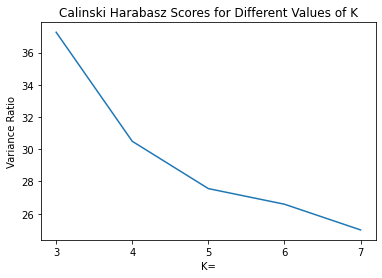

In [22]:
#visualize the calinski_harabasz score 
plt.plot([3, 4, 5, 6, 7], CH_score)
plt.xticks([3,4,5,6,7])
plt.title('Calinski Harabasz Scores for Different Values of K')
plt.ylabel('Variance Ratio')
plt.xlabel('K=')
plt.show()

### 3.1.b Within Cluster Sum of Squares (WCSS) Test Evaluation

In [23]:
#calculate wcss score for each cluster number in k_list 
wcss_score = []

for model in k_list: 
    labels = model.labels_ 
    wcss_score.append(model.inertia_)

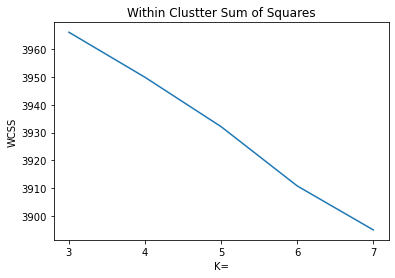

In [24]:
#visualize wcss score 
plt.plot([3, 4, 5, 6, 7], wcss_score)
plt.xticks([3, 4, 5, 6, 7])
plt.title('Within Clustter Sum of Squares')
plt.ylabel('WCSS')
plt.xlabel('K=')
plt.show()

### Conclusion: 


## 3.2 Build a baseline model

In [47]:
#create an instance cluster  
model = KMeans(n_clusters=5, random_state=42)
model.fit(features)

KMeans(n_clusters=5, random_state=42)

In [48]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vec.get_feature_names() 

In [49]:
for i in range(5):
    print("Cluster {}:".format(i)),
    for ind in order_centroids[i, :10]:
        print('%s' % terms[ind])

Cluster 0:
following
called
wave
change
best
did
food
solar
use
matter
Cluster 1:
energy
potential
kinetic
type
example
food
transformation
object
renewable
source
Cluster 2:
does
mean
affect
earth
energy
long
days
sun
complete
approximately
Cluster 3:
waves
sound
travel
light
true
type
properties
transmit
produced
electromagnetic
Cluster 4:
moon
earth
sun
phase
phases
occur
different
causes
lit
eclipse


In [266]:
# reduce the features to 2D
pca = PCA(n_components=3, random_state=42) 
""" You can use more than two here! Only Plot 2 at a time"""
reduced_features = pca.fit_transform(features)

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(cls.cluster_centers_)

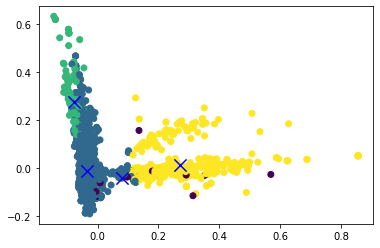

In [278]:
#visulaize clustering 
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.predict(features))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')

### 3.2.a Evaluate Baseline Model

In [269]:
#access the accuracy of the score 
silhouette_score(features, labels=cls.predict(features))

0.007344144331326521

#### Conclusion: 
not very good low score means my clusters are overlapping

# 4 Generate a labeled dataset
Merge the labels generated with KMeans to better understand the types of questions the algotrithm has grouped together.

In [270]:
#collect all the labels and values for the KMeans 
cluster_map = pd.DataFrame()
cluster_map['data_index'] = data.index.values
cluster_map['cluster'] = cls.labels_ 

#sanity check 
cluster_map.head()

,data_index,cluster
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1


In [271]:
#merge the two dataframes on the index
result = df.join(cluster_map.set_index('data_index'))

#sanity check
result.loc[result['cluster'] == 2] 
result.loc[93, "question"]

'In the spaces below, draw the positions of (and label) the Sun, Earth and Moon during eclipses:'

## 4.1 Cluster Label 1

In [272]:
result.loc[result['cluster'] == 1] 

,question,cluster
0,“What is the biggest city in Japan?”,1
1,“Who wrote War and Peace?”,1
2,“How many ounces in a pound?”,1
3,“How would you illustrate the water cycle?”,1
4,“What is the main idea of this story?”,1
...,...,...
4327,Which of Newton’s Law’s do these examples illu...,1
4329,"On a velocity graph, what goes on the “X” axis...",1
4330,What four forces act on an airplane as it flie...,1
4331,forces cause a change in an object’s motion,1


cluster tending toward physical science

## 4.2 Cluster Label 2

In [274]:
result.loc[result['cluster'] == 2] 

,question,cluster
90,Eclipses do not occur every time there is a ne...,2
92,During the class activity in which you modelle...,2
93,"In the spaces below, draw the positions of (an...",2
94,how are tides affected by the phases of the moon?,2
96,What was the highest tide at that location and...,2
...,...,...
4035,How many days does it take for the Moon to orb...,2
4205,Where does the moon get its light?,2
4206,How much of the moon is always lit by the sun?...,2
4208,Draw and label the eight main phases of the mo...,2


cluster trending toward earth / space

## 4.3 Cluster Label 3

In [275]:
result.loc[result['cluster'] == 3] 

,question,cluster
27,Which location on Earth is receiving the most ...,3
170,How did the amount of light energy on each hem...,3
335,What happens to most of the solar energy direc...,3
337,Which list best describes the energy of the ba...,3
338,Which two objects transform electrical energy ...,3
...,...,...
4073,What is the shortest way that the energy from ...,3
4190,What do you notice about how plants get their ...,3
4253,How does the amount of heat energy provided by...,3
4255,How does the amount of heat energy provided by...,3


hot mess

## 4.4 Cluster Label 4

In [279]:
result.loc[result['cluster'] == 4] 

,question,cluster


In [ ]:
cluster to catergory than model per catergory for bandwith standards   
pc - 3 
function that would run through each section 

# 5 Name Question Clusters 
Using the descriptions and titles of science standards in the middle school band (6-8) create a name for each cluster identified.

In [ ]:
"""Look at frequency of words in each standard"""

In [ ]:
#display scrapped science standards
import pickle 
unpickled_df = pd.read_pickle("./dummy.pkl")
unpickled_df

In [ ]:
"""remove stop words 

    identify most common words"""

# 6 Predict Question Type Given Question 
Use supervised learning techniques in combination with the labeled data to predict question type given a question.

In [249]:
#define the target
X = result.drop('cluster', axis=1)
y = result['cluster']

In [250]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [251]:
#vecotrize the X data 
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train.question) 
X_test_counts = count_vect.transform(X_test.question)

In [252]:
#scale down impact of frequently occuring words
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts) 
X_test_tfidf = tfidf_transformer.fit_transform(X_test_counts) 

#look at the shape of each set 
print("X_train Shape:", X_train_tfidf.shape) 
print("X_test Shape:", X_test_tfidf.shape)

X_train Shape: (2903, 3682)
X_test Shape: (1430, 3682)


In [253]:
#instatiate classifiers
mnb = MultinomialNB()
rf = RandomForestClassifier(n_estimators=100)

In [254]:
#fit Multinomial classifier 
mnb.fit(X_train_tfidf, y_train)  

# NB Predictions
mnb_train_preds = nb_classifier.predict(X_train_tfidf) 
mnb_test_preds = nb_classifier.predict(X_test_tfidf)

In [255]:
#fit Random Forest classifier 
rf.fit(X_train_tfidf, y_train)  

# RF Predictions 
rf_train_preds = rf.predict(X_train_tfidf) 
rf_test_preds = mnb.predict(X_test_tfidf)

In [256]:
nb_train_score = accuracy_score(y_train, mnb_train_preds)
nb_test_score = accuracy_score(y_test, mnb_test_preds)
rf_train_score = accuracy_score(y_train, rf_train_preds)
rf_test_score = accuracy_score(y_test, rf_test_preds)

print("Multinomial Naive Bayes")
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(nb_train_score, nb_test_score))
print("")
print('-'*70)
print("")
print('Random Forest')
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(rf_train_score, rf_test_score))

Multinomial Naive Bayes
Training Accuracy: 0.8891 		 Testing Accuracy: 0.8678

----------------------------------------------------------------------

Random Forest
Training Accuracy: 1.0 		 Testing Accuracy: 0.8678


In [ ]:
"""TEST K FOLD PRECISION AND RECALL}""" 

"""Plot feature importance  

Grid search 

confusion matrix - what groups is it confusing together """

# 7 NLP Text Classification 